In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models

import matplotlib.pyplot as plt
%matplotlib inline

### Task 1:
Selecting a CNN from the web to develop as CNN for tensorflow with the MNIST dataset in mind


In [78]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

num_train_samples = x_train.shape[0]
num_test_samples = x_test.shape[0]

x_train = x_train.reshape(num_train_samples, 28, 28, 1)
x_test = x_test.reshape(num_test_samples, 28, 28, 1)

In [79]:
model = tf.keras.models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [80]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_7 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 64)               

In [81]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [82]:
history = model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 31s 16ms/step - loss: 0.3575 - accuracy: 0.8895
Epoch 2/5
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0502 - accuracy: 0.9838
Epoch 3/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0330 - accuracy: 0.9896
Epoch 4/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0267 - accuracy: 0.9910
Epoch 5/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0208 - accuracy: 0.9935


In [83]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0305 - accuracy: 0.9909


[0.030469637364149094, 0.9908999800682068]

### Task 2 Extra Credit:
Randomly place MNIST images into a 56 by 56 new picture.

In [84]:
np.random.seed = 42
def convert_to_56(img):
    img_size = img.shape[0]
    converted_imgs = np.zeros((img_size, 56, 56, 1))

    for im in range(img.shape[0]):
        h = np.random.randint(low=0,high=29)
        w =np.random.randint(low=0,high=29)
        converted_imgs[im,h:h+28,w:w+28] = img[im]
    return converted_imgs

In [85]:
x_train_56 = convert_to_56(x_train)
x_test_56 = convert_to_56(x_test)
x_train_56.shape, x_test_56.shape

((60000, 56, 56, 1), (10000, 56, 56, 1))

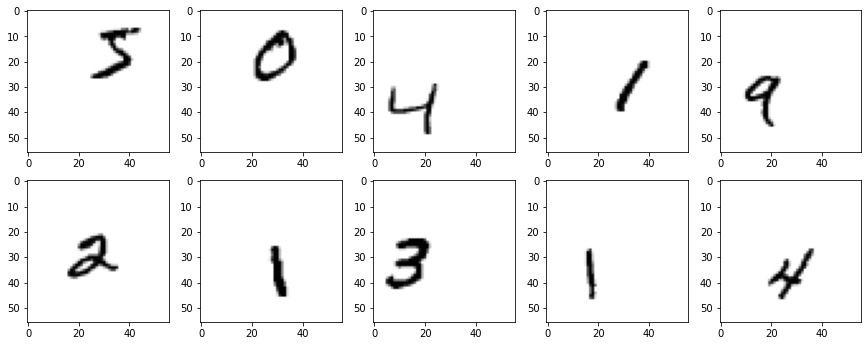

In [86]:
plt.figure(figsize=(15, 12))
for i in range(10):
    plt.subplot(4, 5, i+1)
    plt.imshow(-x_train_56[i].reshape(56,56), cmap='gray')

In [88]:
model = tf.keras.models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(56, 56, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [89]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [90]:
history = model.fit(x_train_56, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 121s 64ms/step - loss: 0.8412 - accuracy: 0.7049
Epoch 2/5
1875/1875 [==============================] - 117s 63ms/step - loss: 0.0979 - accuracy: 0.9702
Epoch 3/5
1875/1875 [==============================] - 106s 56ms/step - loss: 0.0509 - accuracy: 0.9843
Epoch 4/5
1875/1875 [==============================] - 115s 61ms/step - loss: 0.0331 - accuracy: 0.9890
Epoch 5/5
1875/1875 [==============================] - 122s 65ms/step - loss: 0.0232 - accuracy: 0.9922


In [91]:
model.evaluate(x_test_56, y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.0772 - accuracy: 0.9778


[0.07716860622167587, 0.9778000116348267]

In [92]:
model_p3 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(56, 56)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [93]:
model_p3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [94]:
model_p3.fit(x_train_56, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 1.7001 - accuracy: 0.3795
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6404 - accuracy: 0.7854
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4285 - accuracy: 0.8579
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3340 - accuracy: 0.8886
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2658 - accuracy: 0.9136


313/313 - 3s - loss: 0.0772 - accuracy: 0.9778
313/313 - 0s - loss: 0.4918 - accuracy: 0.8504


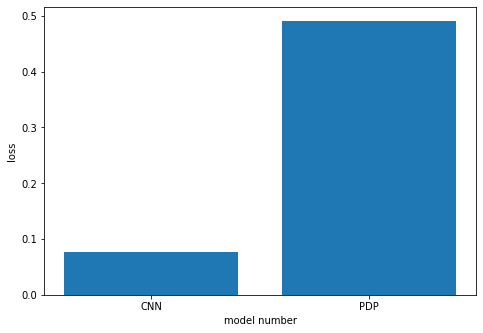

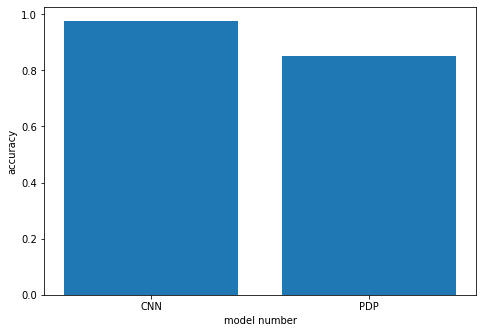

In [95]:
model_results = []
model_results.append(model.evaluate(x_test_56, y_test, verbose=2))
model_results.append(model_p3.evaluate(x_test_56,  y_test, verbose=2))
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
models = ['CNN', 'PDP']
loss = [model_results[i][0] for i in range(len(model_results))]
ax.bar(models,loss)
ax.set_ylabel('loss')
ax.set_xlabel('model number')
plt.show()

fig_2 = plt.figure()
ax_2 = fig_2.add_axes([0,0,1,1])
acc = [model_results[i][1] for i in range(len(model_results))]
ax_2.bar(models,acc)
ax_2.set_ylabel('accuracy')
ax_2.set_xlabel('model number')
plt.show()

### Task 3: 
Training images in bottom half, testing images in top half

In [96]:
np.random.sedd = 42
def convert_to_56_top_bottom(img, h):
    img_size = img.shape[0]
    converted_imgs = np.zeros((img_size, 56, 56, 1))
    for im in range(img.shape[0]):
        w =np.random.randint(low=0,high=29)
        converted_imgs[im,h:h+28,w:w+28] = img[im]
    return converted_imgs

In [97]:
x_train_top = convert_to_56_top_bottom(x_train, 0)
x_test_bottom = convert_to_56_top_bottom(x_test, 28)
x_train_top.shape, x_test_bottom.shape

((60000, 56, 56, 1), (10000, 56, 56, 1))

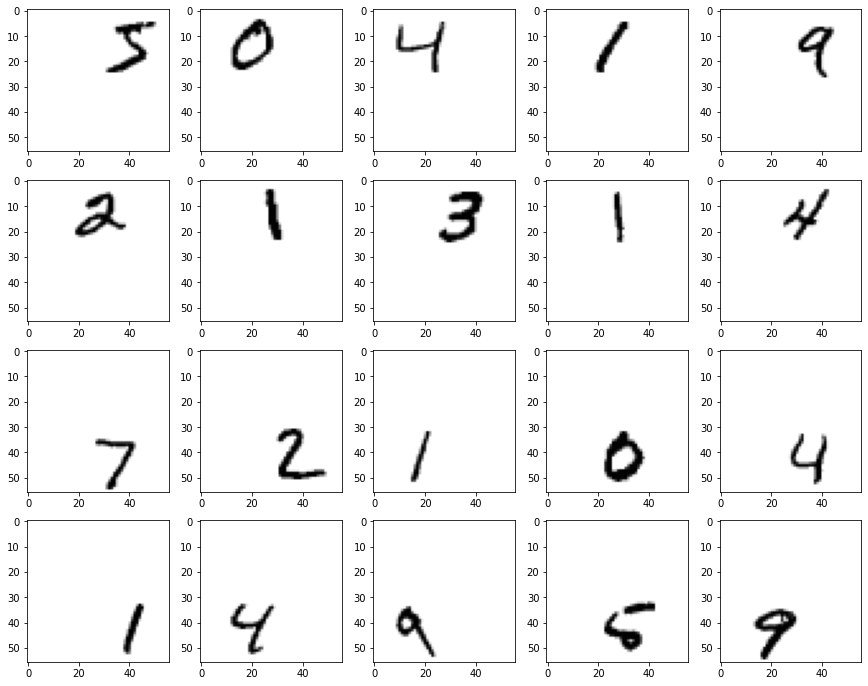

In [98]:
plt.figure(figsize=(15, 12))
for i in range(10):
    plt.subplot(4, 5, i+1)
    plt.imshow(-x_train_top[i].reshape(56,56), cmap='gray')
    plt.subplot(4, 5, i+11)
    plt.imshow(-x_test_bottom[i].reshape(56, 56), cmap='gray')

In [99]:
model = tf.keras.models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(56, 56, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [100]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [101]:
model.fit(x_train_top, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 116s 62ms/step - loss: 0.4587 - accuracy: 0.8487
Epoch 2/5
1875/1875 [==============================] - 110s 59ms/step - loss: 0.0591 - accuracy: 0.9816
Epoch 3/5
1875/1875 [==============================] - 125s 67ms/step - loss: 0.0383 - accuracy: 0.9877
Epoch 4/5
1875/1875 [==============================] - 113s 60ms/step - loss: 0.0255 - accuracy: 0.9916
Epoch 5/5
1875/1875 [==============================] - 135s 72ms/step - loss: 0.0151 - accuracy: 0.9949


In [102]:
model_p3 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(56, 56)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [103]:
model_p3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [104]:
model_p3.fit(x_train_top, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.8389 - accuracy: 0.7262
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2345 - accuracy: 0.9273
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1689 - accuracy: 0.9478
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1316 - accuracy: 0.9583
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1073 - accuracy: 0.9659


313/313 - 4s - loss: 7.4226 - accuracy: 0.0561
313/313 - 1s - loss: 3.1983 - accuracy: 0.1087


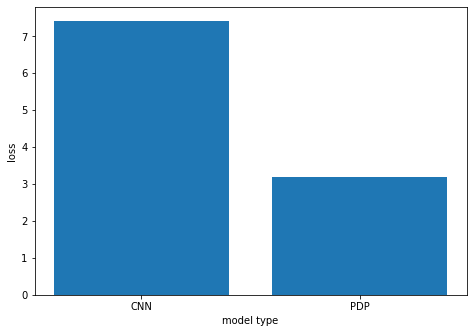

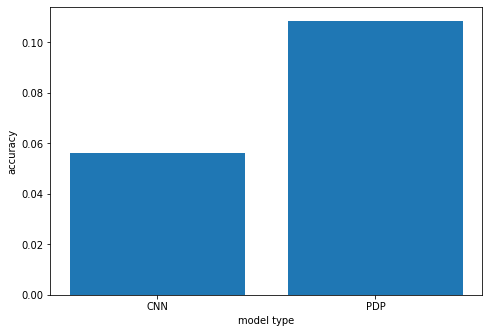

In [105]:
model_results = []
model_results.append(model.evaluate(x_test_bottom, y_test, verbose=2))
model_results.append(model_p3.evaluate(x_test_bottom,  y_test, verbose=2))
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
models = ['CNN', 'PDP']
loss = [model_results[i][0] for i in range(len(model_results))]
ax.bar(models,loss)
ax.set_ylabel('loss')
ax.set_xlabel('model type')
plt.show()

fig_2 = plt.figure()
ax_2 = fig_2.add_axes([0,0,1,1])
acc = [model_results[i][1] for i in range(len(model_results))]
ax_2.bar(models,acc)
ax_2.set_ylabel('accuracy')
ax_2.set_xlabel('model type')
plt.show()

### Task 4:
New variarnt on data. Mirrored images.

In [106]:
import copy as copy
import cv2
def mirror_imgs(original):
    mirrored = []
    for img in original:
        mirrored.append(cv2.flip(img, 1))
    return np.array(mirrored)


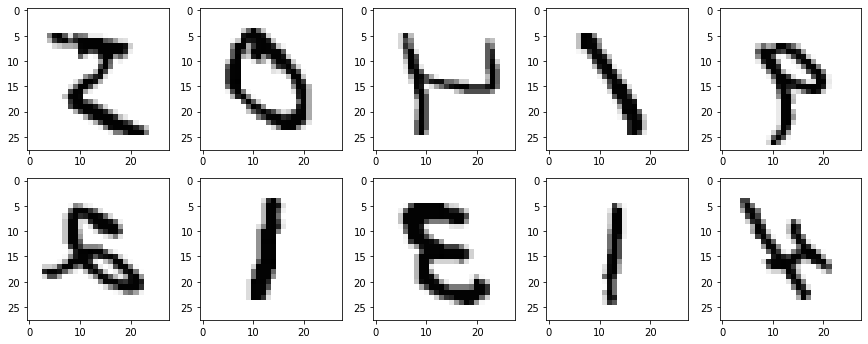

In [107]:
mirrored = mirror_imgs(x_train)
plt.figure(figsize=(15, 12))
for i in range(10):
    plt.subplot(4, 5, i+1)
    plt.imshow(-mirrored[i], cmap='gray')

In [108]:
mirrored_x_train = mirror_imgs(x_train)
mirrored_x_test = mirror_imgs(x_test)

num_train_samples = mirrored_x_train.shape[0]
num_test_samples = mirrored_x_test.shape[0]

mirrored_x_train = x_train.reshape(num_train_samples, 28, 28, 1)
mirrored_x_test = x_test.reshape(num_test_samples, 28, 28, 1)
mirrored_x_train.shape, mirrored_x_test.shape, y_train.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000,))

In [109]:
mirrored_model = tf.keras.models.Sequential()
mirrored_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
mirrored_model.add(layers.MaxPooling2D((2, 2)))
mirrored_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
mirrored_model.add(layers.MaxPooling2D((2, 2)))
mirrored_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
mirrored_model.add(layers.Flatten())
mirrored_model.add(layers.Dense(64, activation='relu'))
mirrored_model.add(layers.Dense(10))

In [110]:
mirrored_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [111]:
mirrored_model.fit(mirrored_x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 42s 22ms/step - loss: 0.3602 - accuracy: 0.8830
Epoch 2/5
1875/1875 [==============================] - 42s 23ms/step - loss: 0.0496 - accuracy: 0.9845
Epoch 3/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0328 - accuracy: 0.9896
Epoch 4/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0244 - accuracy: 0.9924
Epoch 5/5
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0189 - accuracy: 0.9936


In [112]:
mirrored_model.evaluate(mirrored_x_test, y_test, verbose=2)

313/313 - 1s - loss: 0.0362 - accuracy: 0.9886


[0.036182109266519547, 0.9886000156402588]

In [113]:
model_p3_mirror = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [114]:
model_p3_mirror.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [115]:
model_p3_mirror.fit(mirrored_x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4279 - accuracy: 0.8729
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1121 - accuracy: 0.9665
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0818 - accuracy: 0.9751
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0586 - accuracy: 0.9814
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0517 - accuracy: 0.9836


313/313 - 1s - loss: 0.0362 - accuracy: 0.9886
313/313 - 0s - loss: 0.0889 - accuracy: 0.9762


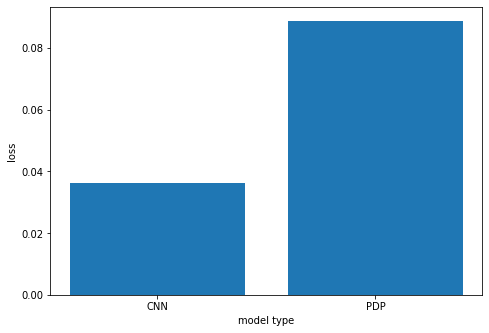

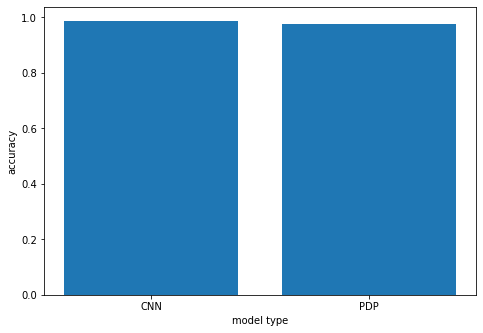

In [116]:
mirrored_results = []
mirrored_results.append(mirrored_model.evaluate(mirrored_x_test, y_test, verbose=2))
mirrored_results.append(model_p3_mirror.evaluate(mirrored_x_test,  y_test, verbose=2))
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
models = ['CNN', 'PDP']
loss = [mirrored_results[i][0] for i in range(len(mirrored_results))]
ax.bar(models,loss)
ax.set_ylabel('loss')
ax.set_xlabel('model type')
plt.show()

fig_2 = plt.figure()
ax_2 = fig_2.add_axes([0,0,1,1])
acc = [mirrored_results[i][1] for i in range(len(mirrored_results))]
ax_2.bar(models,acc)
ax_2.set_ylabel('accuracy')
ax_2.set_xlabel('model type')
plt.show()

### Extra Credit
For extra credit we wanted to augment the data through color augmentation. Specifically, contrast audmentation.

In [117]:
# source: https://stackoverflow.com/questions/19363293/whats-the-fastest-way-to-increase-color-image-contrast-with-opencv-in-python-c

import cv2
from pylab import array, plot, show, axis, arange, figure, uint8 
def decrease_contrast(original):
    decreased = []
    max_intensity = 5000.0
    x = arange(max_intensity)
    
    phi = 1
    theta = 1
    
    for img in original:
        decreased_img = (max_intensity/phi)*(img/(max_intensity/theta))**0.5
        decreased_img = array(decreased_img,dtype=uint8)
        decreased.append(decreased_img)
    return np.array(decreased)

In [118]:
decreased = decrease_contrast(x_train)
for i, img in zip(range(3), decreased):
    scale_percent = 1000
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    dim = (width, height)
    img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    cv2.imshow(f'Decreased img { i + 1}', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Tasks 1-4 With Augmented Dataset

In [121]:
decreased_x_train = decrease_contrast(x_train)
decreased_x_test = decrease_contrast(x_test)

num_train_samples = decreased_x_train.shape[0]
num_test_samples = decreased_x_test.shape[0]

decreased_x_train = x_train.reshape(num_train_samples, 28, 28, 1)
decreased_x_test = x_test.reshape(num_test_samples, 28, 28, 1)
decreased_x_train.shape, decreased_x_test.shape, y_train.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000,))

In [122]:
model = tf.keras.models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [123]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [124]:
history = model.fit(decreased_x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 48s 25ms/step - loss: 0.3349 - accuracy: 0.8949
Epoch 2/5
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0482 - accuracy: 0.9844
Epoch 3/5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0333 - accuracy: 0.9893
Epoch 4/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0264 - accuracy: 0.9912
Epoch 5/5
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0185 - accuracy: 0.9938


In [125]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0256 - accuracy: 0.9912


[0.02561156637966633, 0.9911999702453613]

### Task 2:
Randomly place MNIST images into a 56 by 56 new picture.

In [126]:
np.random.seed = 42
def convert_to_56(img):
    img_size = img.shape[0]
    converted_imgs = np.zeros((img_size, 56, 56, 1))

    for im in range(img.shape[0]):
        h = np.random.randint(low=0,high=29)
        w =np.random.randint(low=0,high=29)
        converted_imgs[im,h:h+28,w:w+28] = img[im]
    return converted_imgs

In [127]:
x_train_56 = convert_to_56(decreased_x_train)
x_test_56 = convert_to_56(x_test)
x_train_56.shape, x_test_56.shape

((60000, 56, 56, 1), (10000, 56, 56, 1))

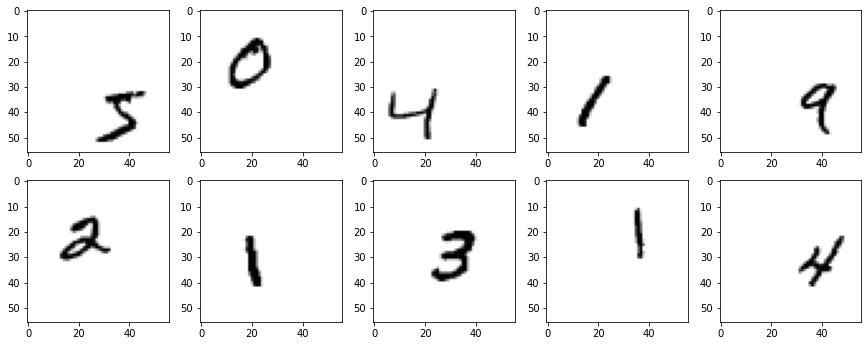

In [128]:
plt.figure(figsize=(15, 12))
for i in range(10):
    plt.subplot(4, 5, i+1)
    plt.imshow(-x_train_56[i].reshape(56,56), cmap='gray')

In [131]:
model = tf.keras.models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(56, 56, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [132]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [133]:
history = model.fit(x_train_56, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 139s 74ms/step - loss: 0.9343 - accuracy: 0.6703
Epoch 2/5
1875/1875 [==============================] - 152s 81ms/step - loss: 0.1227 - accuracy: 0.9619
Epoch 3/5
1875/1875 [==============================] - 157s 84ms/step - loss: 0.0651 - accuracy: 0.9794
Epoch 4/5
1875/1875 [==============================] - 160s 85ms/step - loss: 0.0392 - accuracy: 0.9872
Epoch 5/5
1875/1875 [==============================] - 159s 85ms/step - loss: 0.0260 - accuracy: 0.9916


In [134]:
model.evaluate(x_test_56, y_test)

313/313 [==============================] - 5s 16ms/step - loss: 0.0949 - accuracy: 0.9704


[0.09490031749010086, 0.9703999757766724]

In [135]:
model_p3 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(56, 56)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [136]:
model_p3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [137]:
model_p3.fit(x_train_56, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 1.6541 - accuracy: 0.3967
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6515 - accuracy: 0.7780
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4506 - accuracy: 0.8537
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3458 - accuracy: 0.8882
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2792 - accuracy: 0.9085


313/313 - 4s - loss: 0.0949 - accuracy: 0.9704
313/313 - 1s - loss: 0.5020 - accuracy: 0.8454


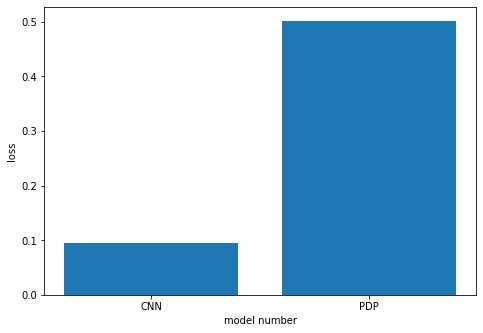

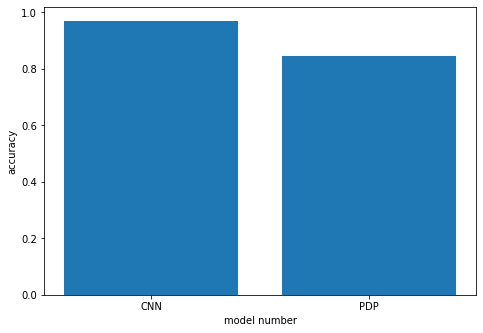

In [138]:
model_results = []
model_results.append(model.evaluate(x_test_56, y_test, verbose=2))
model_results.append(model_p3.evaluate(x_test_56,  y_test, verbose=2))
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
models = ['CNN', 'PDP']
loss = [model_results[i][0] for i in range(len(model_results))]
ax.bar(models,loss)
ax.set_ylabel('loss')
ax.set_xlabel('model number')
plt.show()

fig_2 = plt.figure()
ax_2 = fig_2.add_axes([0,0,1,1])
acc = [model_results[i][1] for i in range(len(model_results))]
ax_2.bar(models,acc)
ax_2.set_ylabel('accuracy')
ax_2.set_xlabel('model number')
plt.show()

### Task 3: 
Training images in bottom half, testing images in top half

In [139]:
np.random.sedd = 42
def convert_to_56_top_bottom(img, h):
    img_size = img.shape[0]
    converted_imgs = np.zeros((img_size, 56, 56, 1))
    for im in range(img.shape[0]):
        w =np.random.randint(low=0,high=29)
        converted_imgs[im,h:h+28,w:w+28] = img[im]
    return converted_imgs

In [140]:
x_train_top = convert_to_56_top_bottom(decreased_x_train, 0)
x_test_bottom = convert_to_56_top_bottom(decreased_x_test, 28)
x_train_top.shape, x_test_bottom.shape

((60000, 56, 56, 1), (10000, 56, 56, 1))

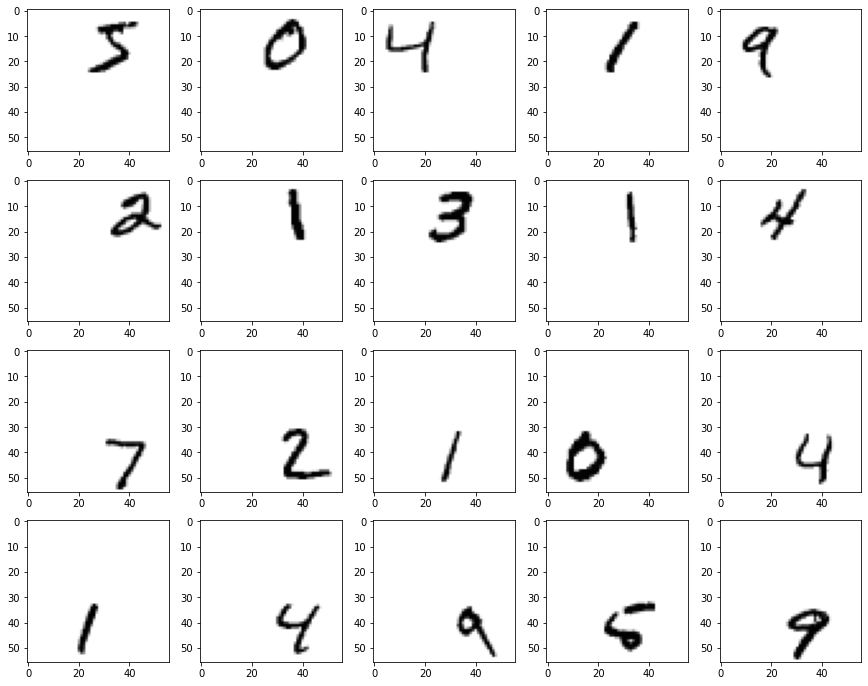

In [141]:
plt.figure(figsize=(15, 12))
for i in range(10):
    plt.subplot(4, 5, i+1)
    plt.imshow(-x_train_top[i].reshape(56,56), cmap='gray')
    plt.subplot(4, 5, i+11)
    plt.imshow(-x_test_bottom[i].reshape(56, 56), cmap='gray')

In [142]:
model = tf.keras.models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(56, 56, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [143]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [144]:
model.fit(x_train_top, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 134s 71ms/step - loss: 0.4546 - accuracy: 0.8468
Epoch 2/5
1875/1875 [==============================] - 105s 56ms/step - loss: 0.0613 - accuracy: 0.9809
Epoch 3/5
1875/1875 [==============================] - 105s 56ms/step - loss: 0.0375 - accuracy: 0.9880
Epoch 4/5
1875/1875 [==============================] - 105s 56ms/step - loss: 0.0253 - accuracy: 0.9919
Epoch 5/5
1875/1875 [==============================] - 158s 84ms/step - loss: 0.0189 - accuracy: 0.9939


In [145]:
model_p3 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(56, 56)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [146]:
model_p3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [147]:
model_p3.fit(x_train_top, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.8464 - accuracy: 0.7179
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2421 - accuracy: 0.9258
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1623 - accuracy: 0.9491
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1222 - accuracy: 0.9612
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1034 - accuracy: 0.9670


313/313 - 6s - loss: 7.9650 - accuracy: 0.1024
313/313 - 1s - loss: 3.2523 - accuracy: 0.0979


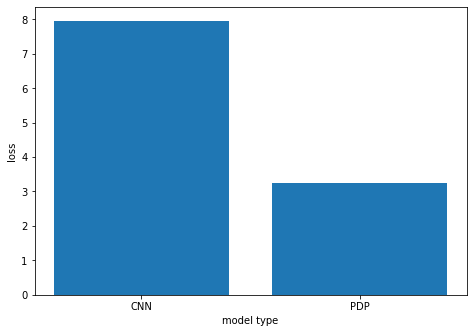

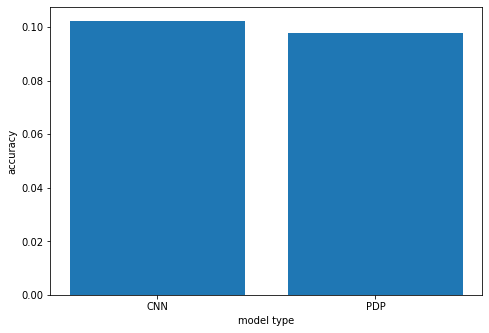

In [148]:
model_results = []
model_results.append(model.evaluate(x_test_bottom, y_test, verbose=2))
model_results.append(model_p3.evaluate(x_test_bottom,  y_test, verbose=2))
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
models = ['CNN', 'PDP']
loss = [model_results[i][0] for i in range(len(model_results))]
ax.bar(models,loss)
ax.set_ylabel('loss')
ax.set_xlabel('model type')
plt.show()

fig_2 = plt.figure()
ax_2 = fig_2.add_axes([0,0,1,1])
acc = [model_results[i][1] for i in range(len(model_results))]
ax_2.bar(models,acc)
ax_2.set_ylabel('accuracy')
ax_2.set_xlabel('model type')
plt.show()

### Task 4:
New variarnt on data. Mirrored images.

In [149]:
import copy as copy
import cv2
def mirror_imgs(original):
    mirrored = []
    for img in original:
        mirrored.append(cv2.flip(img, 1))
    return np.array(mirrored)


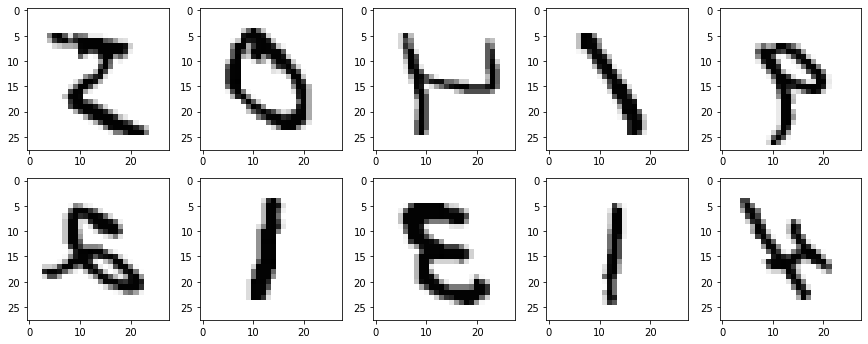

In [150]:
mirrored = mirror_imgs(x_train)
plt.figure(figsize=(15, 12))
for i in range(10):
    plt.subplot(4, 5, i+1)
    plt.imshow(-mirrored[i], cmap='gray')

In [151]:
mirrored_x_train = mirror_imgs(decreased_x_train)
mirrored_x_test = mirror_imgs(decreased_x_test)

num_train_samples = mirrored_x_train.shape[0]
num_test_samples = mirrored_x_test.shape[0]

mirrored_x_train = x_train.reshape(num_train_samples, 28, 28, 1)
mirrored_x_test = x_test.reshape(num_test_samples, 28, 28, 1)
mirrored_x_train.shape, mirrored_x_test.shape, y_train.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000,))

In [152]:
mirrored_model = tf.keras.models.Sequential()
mirrored_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
mirrored_model.add(layers.MaxPooling2D((2, 2)))
mirrored_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
mirrored_model.add(layers.MaxPooling2D((2, 2)))
mirrored_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
mirrored_model.add(layers.Flatten())
mirrored_model.add(layers.Dense(64, activation='relu'))
mirrored_model.add(layers.Dense(10))

In [153]:
mirrored_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [154]:
mirrored_model.fit(mirrored_x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 44s 23ms/step - loss: 0.3501 - accuracy: 0.8868
Epoch 2/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0477 - accuracy: 0.9850
Epoch 3/5
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0314 - accuracy: 0.9895
Epoch 4/5
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0248 - accuracy: 0.9925
Epoch 5/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0189 - accuracy: 0.9937


In [155]:
mirrored_model.evaluate(mirrored_x_test, y_test, verbose=2)

313/313 - 1s - loss: 0.0358 - accuracy: 0.9888


[0.035835374146699905, 0.9887999892234802]

In [156]:
model_p3_mirror = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [157]:
model_p3_mirror.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [158]:
model_p3_mirror.fit(mirrored_x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4258 - accuracy: 0.8705
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1115 - accuracy: 0.9672
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0756 - accuracy: 0.9774
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0600 - accuracy: 0.9811
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0501 - accuracy: 0.9838


313/313 - 1s - loss: 0.0358 - accuracy: 0.9888
313/313 - 0s - loss: 0.0717 - accuracy: 0.9772


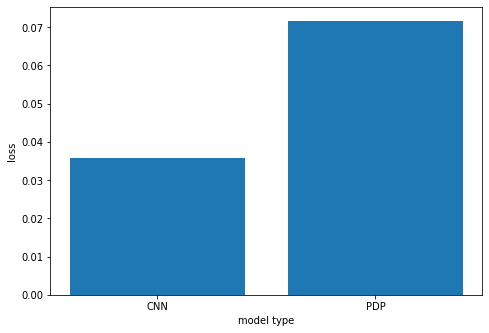

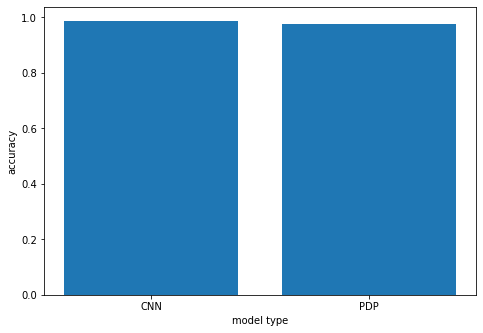

In [159]:
mirrored_results = []
mirrored_results.append(mirrored_model.evaluate(mirrored_x_test, y_test, verbose=2))
mirrored_results.append(model_p3_mirror.evaluate(mirrored_x_test,  y_test, verbose=2))
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
models = ['CNN', 'PDP']
loss = [mirrored_results[i][0] for i in range(len(mirrored_results))]
ax.bar(models,loss)
ax.set_ylabel('loss')
ax.set_xlabel('model type')
plt.show()

fig_2 = plt.figure()
ax_2 = fig_2.add_axes([0,0,1,1])
acc = [mirrored_results[i][1] for i in range(len(mirrored_results))]
ax_2.bar(models,acc)
ax_2.set_ylabel('accuracy')
ax_2.set_xlabel('model type')
plt.show()